<a href="https://colab.research.google.com/github/cukri/Regression_model_Age/blob/main/Przewidywanie_wieku_sluchotek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers

In [ ]:
data = pd.read_csv('abalone.csv')
data = data[data['Height'] <= 0.5]

In [ ]:
print(data)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole weight    4175 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4175 non-null   float64
 7   Shell weight    4175 non-null   float64
 8   Rings           4175 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB
None


In [ ]:
y = data['Rings']
X = data.drop('Rings', axis=1)

In [ ]:
print(y)
print(X)
print(y.shape)
print(X.shape)

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4175, dtype: int64
     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  

In [ ]:

print("Missing values in each column:")
print(data.isnull().sum())

print("\nNumber of duplicate rows:", data.duplicated().sum())

Missing values in each column:
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Number of duplicate rows: 0


In [ ]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
zero_values_rows = data[(data[numerical_columns] == 0).any(axis=1)]

print("Rows with zero values in any numerical column:")
display(zero_values_rows)

Rows with zero values in any numerical column:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [ ]:
data = data[data['Height'] != 0]

In [ ]:
y = data['Rings']
X = data.drop('Rings', axis=1)

In [ ]:
print(y.shape)
print(X.shape)

(4173,)
(4173, 8)


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole weight    4175 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4175 non-null   float64
 7   Shell weight    4175 non-null   float64
 8   Rings           4175 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB
None


In [ ]:
X = pd.get_dummies(X, columns=['Sex'])

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4175.0,0.523965,0.120084,0.0750,0.45000,0.5450,0.61500,0.8150
Diameter,4175.0,0.407856,0.099230,0.0550,0.35000,0.4250,0.48000,0.6500
Height,4175.0,0.139189,0.038489,0.0000,0.11500,0.1400,0.16500,0.2500
Whole weight,4175.0,0.828468,0.490027,0.0020,0.44150,0.7995,1.15300,2.8255
Shucked weight,4175.0,0.359195,0.221713,0.0010,0.18600,0.3360,0.50175,1.4880
Viscera weight,4175.0,0.180536,0.109534,0.0005,0.09325,0.1710,0.25275,0.7600
Shell weight,4175.0,0.238791,0.139162,0.0015,0.13000,0.2340,0.32875,1.0050
Rings,4175.0,9.934132,3.224802,1.0000,8.00000,9.0000,11.00000,29.0000


In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4173 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4173 non-null   float64
 1   Diameter        4173 non-null   float64
 2   Height          4173 non-null   float64
 3   Whole weight    4173 non-null   float64
 4   Shucked weight  4173 non-null   float64
 5   Viscera weight  4173 non-null   float64
 6   Shell weight    4173 non-null   float64
 7   Sex_F           4173 non-null   bool   
 8   Sex_I           4173 non-null   bool   
 9   Sex_M           4173 non-null   bool   
dtypes: bool(3), float64(7)
memory usage: 273.0 KB
None


In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

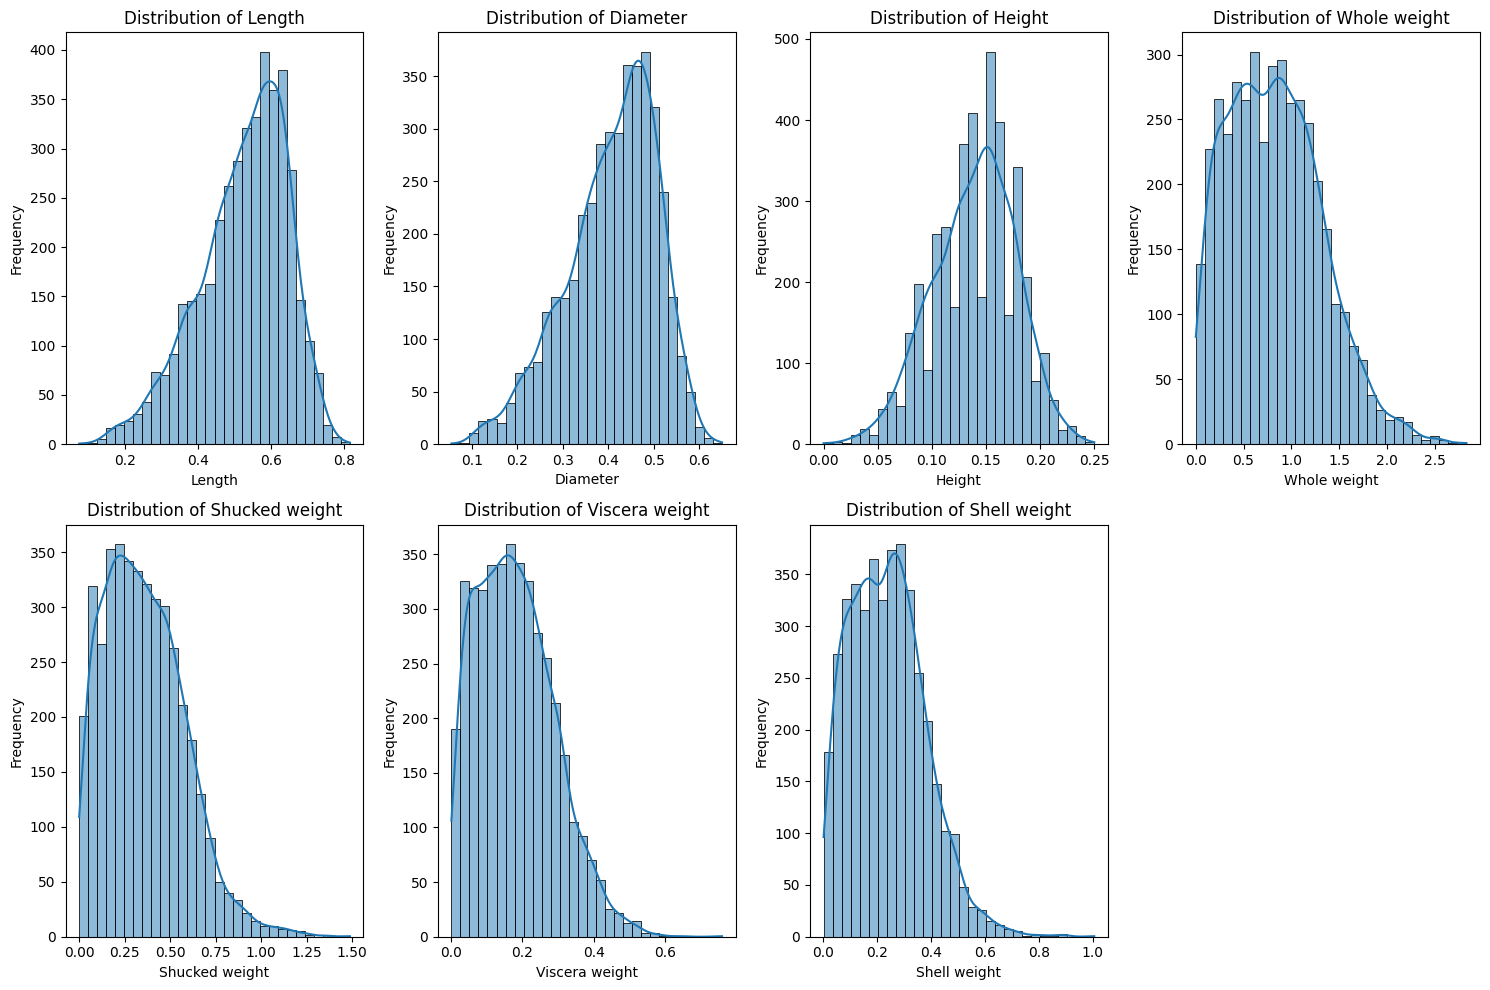

In [ ]:
columns_to_analyze = ['Length', 'Diameter', 'Height', 'Whole weight',
                       'Shucked weight', 'Viscera weight', 'Shell weight']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_analyze):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

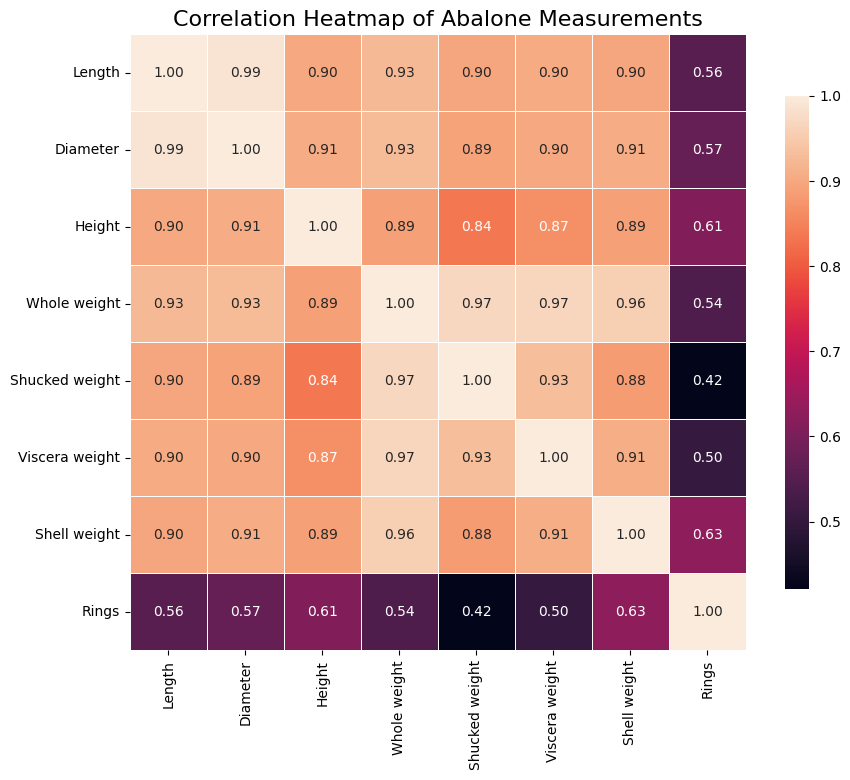

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",
            square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

plt.title('Correlation Heatmap of Abalone Measurements', fontsize=16)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.9091 - mse: 0.9091 - val_loss: 0.8978 - val_mse: 0.8978
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7398 - mse: 0.7398 - val_loss: 0.7989 - val_mse: 0.7989
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6927 - mse: 0.6927 - val_loss: 0.7577 - val_mse: 0.7577
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6242 - mse: 0.6242 - val_loss: 0.7285 - val_mse: 0.7285
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6451 - mse: 0.6451 - val_loss: 0.7062 - val_mse: 0.7062
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5839 - mse: 0.5839 - val_loss: 0.6764 - val_mse: 0.6764
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5864 - mse: 0.5864 - val_loss: 0.6531 - val_mse: 0.6531
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5775 - mse: 0.5775 - val_loss: 0.6255 - val_mse: 0.6255
Epoch 9/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
y_train_inv = scaler_y.inverse_transform(y_train)
y_test_inv = scaler_y.inverse_transform(y_test)
y_train_pred_inv = np.round(scaler_y.inverse_transform(y_train_pred))
y_test_pred_inv = np.round(scaler_y.inverse_transform(y_test_pred))

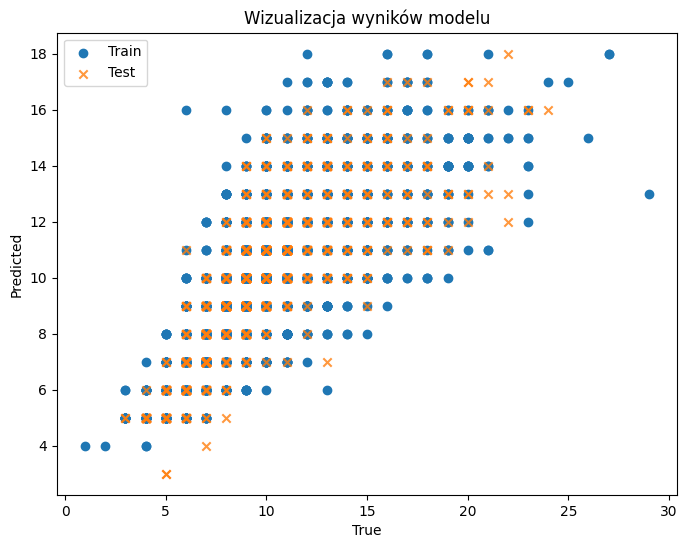

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_inv, y_train_pred_inv, label='Train')
plt.scatter(y_test_inv, y_test_pred_inv, label='Test', marker='x', alpha=0.8)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Wizualizacja wyników modelu')
plt.legend()
plt.show()

In [ ]:
mse_train = mean_squared_error(y_train_inv, y_train_pred_inv)
mse_test = mean_squared_error(y_test_inv, y_test_pred_inv)
r2_train = r2_score(y_train_inv, y_train_pred_inv)
r2_test = r2_score(y_test_inv, y_test_pred_inv)

print(f'MSE (Train): {mse_train:.4f}')
print(f'MSE (Test): {mse_test:.4f}')
print(f'R2 (Train): {r2_train:.4f}')
print(f'R2 (Test): {r2_test:.4f}')

MSE (Train): 4.4823
MSE (Test): 4.4970
R2 (Train): 0.5517
R2 (Test): 0.6247


In [ ]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Input((X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear')
])


In [ ]:
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

In [ ]:

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_2.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),
                    callbacks=[early_stop, reduce_lr])


Epoch 1/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4389 - mse: 0.4389 - val_loss: 0.4285 - val_mse: 0.4285 - learning_rate: 5.0000e-04
Epoch 2/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4037 - mse: 0.4037 - val_loss: 0.4280 - val_mse: 0.4280 - learning_rate: 5.0000e-04
Epoch 3/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4145 - mse: 0.4145 - val_loss: 0.4292 - val_mse: 0.4292 - learning_rate: 5.0000e-04
Epoch 4/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4321 - mse: 0.4321 - val_loss: 0.4300 - val_mse: 0.4300 - learning_rate: 5.0000e-04
Epoch 5/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3873 - mse: 0.3873 - val_loss: 0.4295 - val_mse: 0.4295 - learning_rate: 5.0000e-04
Epoch 6/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4048 - mse: 0.4048 - val_loss: 0.4292 - val_mse: 0.4292 - learning_rate: 5.0000e-04
Epoch 7/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4286 - mse: 0.4286 - val_loss: 0.4274 - val_mse: 0.4274

In [ ]:
y_train_pred_2 = model_2.predict(X_train)
y_test_pred_2 = model_2.predict(X_test)

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
y_train_inv = scaler_y.inverse_transform(y_train)
y_test_inv = scaler_y.inverse_transform(y_test)
y_train_pred_inv_2 = np.round(scaler_y.inverse_transform(y_train_pred_2))
y_test_pred_inv_2 = np.round(scaler_y.inverse_transform(y_test_pred_2))

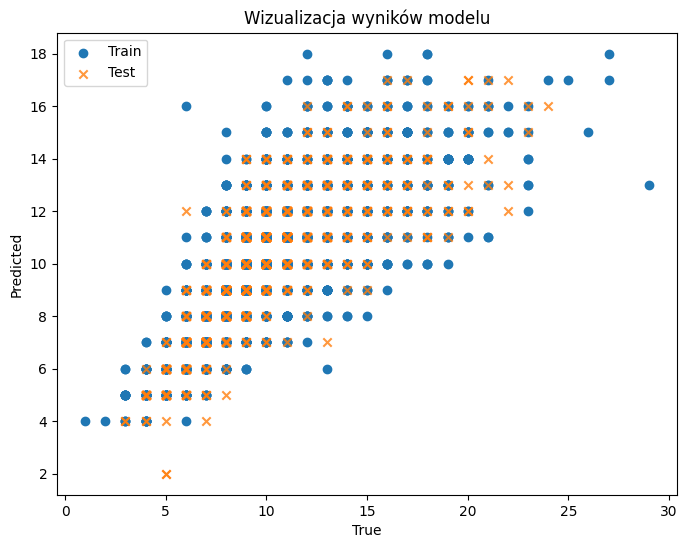

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_inv, y_train_pred_inv_2, label='Train')
plt.scatter(y_test_inv, y_test_pred_inv_2, label='Test', marker='x', alpha=0.8)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Wizualizacja wyników modelu')
plt.legend()
plt.show()

In [ ]:
mse_train_2 = mean_squared_error(y_train_inv, y_train_pred_inv_2)
mse_test_2 = mean_squared_error(y_test_inv, y_test_pred_inv_2)
r2_train_2 = r2_score(y_train_inv, y_train_pred_inv_2)
r2_test_2 = r2_score(y_test_inv, y_test_pred_inv_2)

print(f'MSE (Train): {mse_train_2:.4f}')
print(f'MSE (Test): {mse_test_2:.4f}')
print(f'R2 (Train): {r2_train_2:.4f}')
print(f'R2 (Test): {r2_test_2:.4f}')

MSE (Train): 4.3841
MSE (Test): 4.4958
R2 (Train): 0.5615
R2 (Test): 0.6248


In [ ]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Input((X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [ ]:
optimizer = RMSprop(learning_rate=0.05)
model_3.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

In [ ]:

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.001, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_3.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),
                    callbacks=[early_stop, reduce_lr])


Epoch 1/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.6501 - mse: 0.6501 - val_loss: 0.5373 - val_mse: 0.5373 - learning_rate: 0.0500
Epoch 2/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5264 - mse: 0.5264 - val_loss: 0.4757 - val_mse: 0.4757 - learning_rate: 0.0500
Epoch 3/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4777 - mse: 0.4777 - val_loss: 0.5206 - val_mse: 0.5206 - learning_rate: 0.0500
Epoch 4/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4919 - mse: 0.4919 - val_loss: 0.5626 - val_mse: 0.5626 - learning_rate: 0.0500
Epoch 5/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4494 - mse: 0.4494 - val_loss: 0.5401 - val_mse: 0.5401 - learning_rate: 0.0500
Epoch 6/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4502 - mse: 0.4502 - val_loss: 0.5452 - val_mse: 0.5452 - learning_rate: 0.0500
Epoch 7/200
103/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4545 - mse: 0.4545
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0250

In [ ]:
y_train_pred_3 = model_3.predict(X_train)
y_test_pred_3 = model_3.predict(X_test)

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
y_train_inv = scaler_y.inverse_transform(y_train)
y_test_inv = scaler_y.inverse_transform(y_test)
y_train_pred_inv_3 = np.round(scaler_y.inverse_transform(y_train_pred_3))
y_test_pred_inv_3 = np.round(scaler_y.inverse_transform(y_test_pred_3))

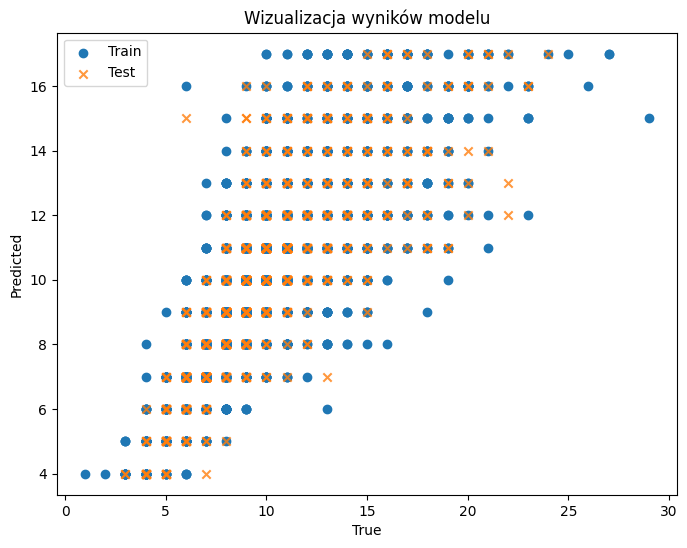

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_inv, y_train_pred_inv_3, label='Train')
plt.scatter(y_test_inv, y_test_pred_inv_3, label='Test', marker='x', alpha=0.8)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Wizualizacja wyników modelu')
plt.legend()
plt.show()

In [ ]:
mse_train_3 = mean_squared_error(y_train_inv, y_train_pred_inv_3)
mse_test_3 = mean_squared_error(y_test_inv, y_test_pred_inv_3)
r2_train_3 = r2_score(y_train_inv, y_train_pred_inv_3)
r2_test_3 = r2_score(y_test_inv, y_test_pred_inv_3)

print(f'MSE (Train): {mse_train_3:.4f}')
print(f'MSE (Test): {mse_test_3:.4f}')
print(f'R2 (Train): {r2_train_3:.4f}')
print(f'R2 (Test): {r2_test_3:.4f}')

MSE (Train): 4.2283
MSE (Test): 4.5485
R2 (Train): 0.5771
R2 (Test): 0.6204


MODEL 3 ZA SZYBKO SIE PRZEUCZA PRZY LEARNING RATE = 0.02. DLA LEARNING RATE =0.001 wyniki są najlepsze:
MSE (Train): 4.1344
MSE (Test): 4.1401
R2 (Train): 0.5998
R2 (Test): 0.6113

In [ ]:
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(8, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='linear')
])
optimizer = RMSprop(learning_rate=0.05)
model_4.compile(optimizer= optimizer, loss='mse', metrics=['mse'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.01, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_4.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),
                    callbacks=[early_stop, reduce_lr], batch_size = 64)

Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.9144 - mse: 0.7866 - val_loss: 1.1521 - val_mse: 1.0856 - learning_rate: 0.0500
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8000 - mse: 0.7248 - val_loss: 1.1358 - val_mse: 1.0744 - learning_rate: 0.0500
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8059 - mse: 0.7320 - val_loss: 1.0087 - val_mse: 0.9252 - learning_rate: 0.0500
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7771 - mse: 0.7024 - val_loss: 0.8180 - val_mse: 0.7173 - learning_rate: 0.0500
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6665 - mse: 0.5909 - val_loss: 0.8338 - val_mse: 0.7680 - learning_rate: 0.0500
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7405 - mse: 0.6676 - val_loss: 1.2190 - val_mse: 1.1677 - learning_rate: 0.0500
Epoch 7/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7704 - mse: 0.6926 - val_loss: 0.8035 - val_mse: 0.7265 - learning_rate: 0.0500
Epoch 8/200


In [ ]:
y_train_pred_4 = model_4.predict(X_train)
y_test_pred_4 = model_4.predict(X_test)

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
y_train_inv = scaler_y.inverse_transform(y_train)
y_test_inv = scaler_y.inverse_transform(y_test)
y_train_pred_inv_4 = np.round(scaler_y.inverse_transform(y_train_pred_4))
y_test_pred_inv_4 = np.round(scaler_y.inverse_transform(y_test_pred_4))

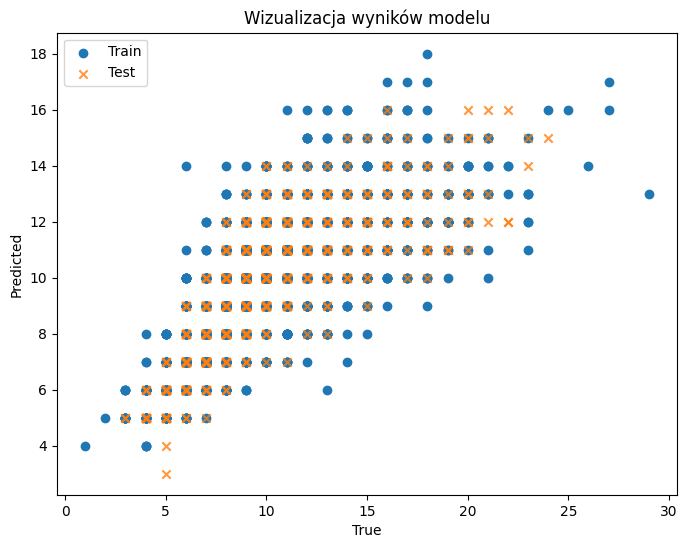

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_inv, y_train_pred_inv_4, label='Train')
plt.scatter(y_test_inv, y_test_pred_inv_4, label='Test', marker='x', alpha=0.8)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Wizualizacja wyników modelu')
plt.legend()
plt.show()

In [ ]:
mse_train_4 = mean_squared_error(y_train_inv, y_train_pred_inv_4)
mse_test_4 = mean_squared_error(y_test_inv, y_test_pred_inv_4)
r2_train_4 = r2_score(y_train_inv, y_train_pred_inv_4)
r2_test_4 = r2_score(y_test_inv, y_test_pred_inv_4)

print(f'MSE (Train): {mse_train_4:.4f}')
print(f'MSE (Test): {mse_test_4:.4f}')
print(f'R2 (Train): {r2_train_4:.4f}')
print(f'R2 (Test): {r2_test_4:.4f}')

MSE (Train): 4.9140
MSE (Test): 5.1281
R2 (Train): 0.5085
R2 (Test): 0.5720


Epoch 1/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.0786 - mse: 0.9315 - val_loss: 1.2746 - val_mse: 1.1936 - learning_rate: 0.0500
Epoch 2/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8158 - mse: 0.7276 - val_loss: 1.3915 - val_mse: 1.3012 - learning_rate: 0.0500
Epoch 3/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7941 - mse: 0.7082 - val_loss: 1.3512 - val_mse: 1.2908 - learning_rate: 0.0500
Epoch 4/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8308 - mse: 0.7546 - val_loss: 0.7506 - val_mse: 0.6766 - learning_rate: 0.0500
Epoch 5/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7698 - mse: 0.6882 - val_loss: 0.9855 - val_mse: 0.8923 - learning_rate: 0.0500
Epoch 6/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7561 - mse: 0.6670 - val_loss: 1.1012 - val_mse: 1.0036 - learning_rate: 0.0500
Epoch 7/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7687 - mse: 0.6857 - val_loss: 1.4437 - val_mse: 1.3702 - learning_rate: 0.0500
Epoch 8/300


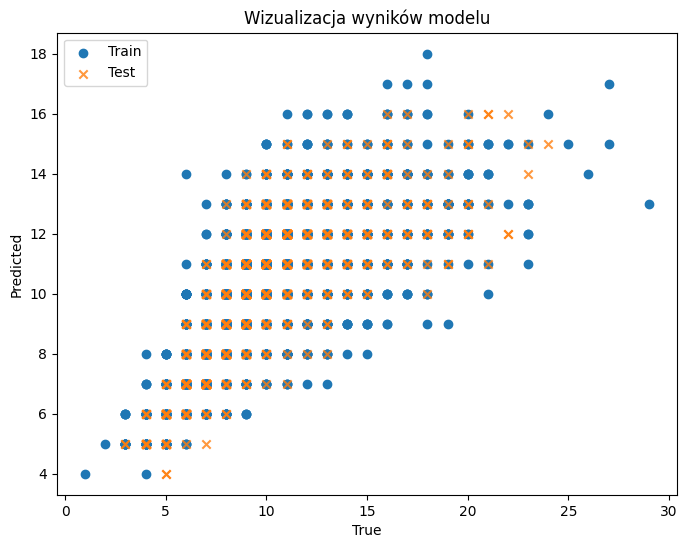

MSE (Train): 5.1408
MSE (Test): 5.4240
R2 (Train): 0.4858
R2 (Test): 0.5474


In [ ]:
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(8, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='linear')
])
optimizer = RMSprop(learning_rate=0.05)
model_5.compile(optimizer= optimizer, loss='mse', metrics=['mse'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.001, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_5.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test),
                    callbacks=[early_stop, reduce_lr], batch_size=128)

y_train_pred_5 = model_5.predict(X_train)
y_test_pred_5 = model_5.predict(X_test)
y_train_inv = scaler_y.inverse_transform(y_train)
y_test_inv = scaler_y.inverse_transform(y_test)
y_train_pred_inv_5 = np.round(scaler_y.inverse_transform(y_train_pred_5))
y_test_pred_inv_5 = np.round(scaler_y.inverse_transform(y_test_pred_5))

plt.figure(figsize=(8, 6))
plt.scatter(y_train_inv, y_train_pred_inv_5, label='Train')
plt.scatter(y_test_inv, y_test_pred_inv_5, label='Test', marker='x', alpha=0.8)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Wizualizacja wyników modelu')
plt.legend()
plt.show()

mse_train_5 = mean_squared_error(y_train_inv, y_train_pred_inv_5)
mse_test_5 = mean_squared_error(y_test_inv, y_test_pred_inv_5)
r2_train_5 = r2_score(y_train_inv, y_train_pred_inv_5)
r2_test_5 = r2_score(y_test_inv, y_test_pred_inv_5)

print(f'MSE (Train): {mse_train_5:.4f}')
print(f'MSE (Test): {mse_test_5:.4f}')
print(f'R2 (Train): {r2_train_5:.4f}')
print(f'R2 (Test): {r2_test_5:.4f}')


Podczas tworzenia modelu dla tego projektu, najlepsze wyniki udało mi się uzyskać dla model_2 oraz model_3. Wyniki dla tych modeli mówią nam, że model_2 lepiej sprawdza się na danych testowych a model_3 na danych treningowych. Nie jest to jeszcze przetrenowanie natomiast prawdopodobnie lepszą opcją byłoby użycie modelu sprawdzającego się wydajniej w generalizacji. Próbowałem użyć regularyzacji wag L2, natomiast wyniki nie są zadowalające. Widać to w przypadku modelu_4, dla którego próbowałem wielokrotnie znaleźć pasujące do siebie wartości L2 oraz min_learning_rate, niestety bezskutecznie. Nawet zwiększenie wielkości batcha do 128 oraz liczby epok do 300, nie przynosi lepszych rezultatów niż model bez wprowadzenia regularyzacji L2. Najlepsze efekty przyniosła więc optymalizacja hiperparametru min_learning_rate do wartości 1e-5.